**Part 2 – Random Forest Model with One-Hot Encoding**

_This is the code used to train RF model with OHE method_

# Data Import

In [1]:
# Common imports
import numpy as np
import pandas as pd

# Figures setting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

Import the X and y

In [2]:
X = pd.read_csv('YourPath/rxnpredict/One-Hot-Encoding_Controls/R_input-OHE/descriptor_table-OHE.csv')

In [3]:
X

,Alcohol 1e,Alcohol 1a,Alcohol 1f,Alcohol 1g,Alcohol 1h,Alcohol 1i,Alcohol 1j,Alcohol 1k,Alcohol 1c,Alcohol 1l,...,Alcohol 1af,Base DBU,Base MTBD,Base BTMG,Base BTPP,Sulfonyl Fluoride 3-Cl,Sulfonyl Fluoride PyFluor,Sulfonyl Fluoride 3-CF3,Sulfonyl Fluoride 3-NO2,Sulfonyl Fluoride PBSF
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
5,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 41 columns):
Alcohol 1e                   640 non-null int64
Alcohol 1a                   640 non-null int64
Alcohol 1f                   640 non-null int64
Alcohol 1g                   640 non-null int64
Alcohol 1h                   640 non-null int64
Alcohol 1i                   640 non-null int64
Alcohol 1j                   640 non-null int64
Alcohol 1k                   640 non-null int64
Alcohol 1c                   640 non-null int64
Alcohol 1l                   640 non-null int64
Alcohol 1d                   640 non-null int64
Alcohol 1m                   640 non-null int64
Alcohol 1n                   640 non-null int64
Alcohol 1o                   640 non-null int64
Alcohol 1p                   640 non-null int64
Alcohol 1q                   640 non-null int64
Alcohol 1b                   640 non-null int64
Alcohol 1r                   640 non-null int64
Alcohol 1s                   64

In [6]:
X = X.astype(np.float)

When importing y data, we need to specify "header=None" to match the data with X. 

In [7]:
y = pd.read_csv('YourPath/rxnpredict/One-Hot-Encoding_Controls/R_input-OHE/observed_yields-OHE.csv', header=None)
y

,0
0,42
1,48
2,47
3,52
4,52
5,76
6,78
7,87
8,82
9,80


In [8]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 1 columns):
0    640 non-null int64
dtypes: int64(1)
memory usage: 5.1 KB


# Data Preprocessing

In this data preprocessing part, we use standard scaler to process X. For y, we need to use .ravel() to extract the values of y.

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = y.values.ravel()

# Data splitting

Split data into 70/30 for train and test.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

y_train, y_test = y_train.astype(np.int), y_test.astype(np.int)

# Random Forest

Based on reported work by same group, we will use random forest model directly. 

In [11]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(max_depth=2, random_state=42, n_estimators=100)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

RMSE_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
R2_rf = r2_score(y_test, y_pred_rf)

print('RMSE:', RMSE_rf)
print('R2 Score:', R2_rf)

RMSE: 27.72611442726863
R2 Score: 0.16362630100070807


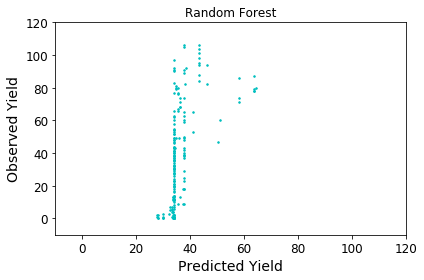

In [13]:
plt.plot(y_pred_rf, y_test, 'c.', markersize=3)
plt.title('Random Forest')
plt.axis([-10, 120, -10, 120])
plt.xlabel('Predicted Yield')
plt.ylabel('Observed Yield')

plt.savefig('./Figs/First Random Forest Model (OHE)', dpi=600, bbox_inches = 'tight')
plt.tight_layout()
plt.show()

## RF Model Optimization w/ Random Search

For RF model, we use random search instead of grid search to look for good parameters.

In [14]:
# Number of trees
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 4000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels 
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 6, 8, 10, 12]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [15]:
import warnings
warnings.filterwarnings('ignore') #These two lines are to remove warning information. You can delete these.

from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor

rf_grid = RandomForestRegressor(random_state=42)

rf_grid_search = RandomizedSearchCV(rf_grid, random_grid, n_iter=30, cv=5, n_jobs=-1,
                           scoring='neg_mean_squared_error', return_train_score=True)
rf_grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=30, n_jobs=-1,
          param_distributions={'n_estimators': [200, 622, 1044, 1466, 1888, 2311, 2733, 3155, 3577, 4000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 6, 8, 10, 12], 'min_samples_leaf': [1, 2, 4, 8, 10], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=0)

In [16]:
print(rf_grid_search.best_params_)
print(rf_grid_search.best_score_)

{'n_estimators': 4000, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': False}
-164.01732417063008


After random search, we use the best parameters to build another RF model and see the performance. 

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_reg = RandomForestRegressor(n_estimators=4000, min_samples_split=6, min_samples_leaf=1,
                               max_features='auto', bootstrap=True,
                               max_depth=70, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

RMSE_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
R2_rf = r2_score(y_test, y_pred_rf)

print('RMSE:', RMSE_rf)
print('R2 Score:', R2_rf)

RMSE: 12.19954436452913
R2 Score: 0.8380766179644452


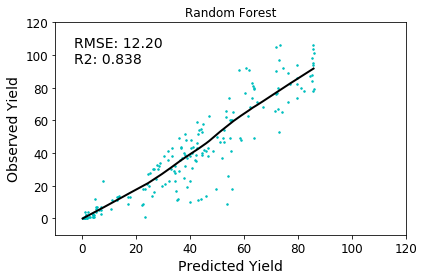

In [18]:
plt.plot(y_pred_rf, y_test, 'c.', markersize=3)
plt.title('Random Forest')
plt.axis([-10, 120, -10, 120])
plt.xlabel('Predicted Yield')
plt.ylabel('Observed Yield')
plt.text(30, 95, "RMSE: 12.20\nR2: 0.838", size=14, va="baseline", ha="right", multialignment="left")

# Plot Lowess curve
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
Z = lowess(y_test, y_pred_rf, frac=0.5, it=2)
plt.plot(Z[:,0],Z[:,1],'k-',lw=2)

plt.savefig('./Figs/Optimized Random Forest Model (OHE)', dpi=600, bbox_inches = 'tight')
plt.tight_layout()
plt.show()

# Evaluate External Data

In [19]:
# Data import
X_ex = pd.read_csv('YourPath/rxnpredict/One-Hot-Encoding_Controls/R_input-OHE/descriptor_table_external_set-OHE.csv').astype(np.float)
y_ex = pd.read_csv('YourPath/rxnpredict/One-Hot-Encoding_Controls/R_input-OHE/external_set_observed_yields-OHE.csv', header=None)

# Data preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_ex_scaled = scaler.fit_transform(X_ex)
y_ex = y_ex.values.ravel()

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

# External Data Performance
y_pred_ex = rf_reg.predict(X_ex_scaled)

RMSE_ex = np.sqrt(mean_squared_error(y_ex, y_pred_ex))
R2_ex = r2_score(y_ex, y_pred_ex)

print('RMSE:', RMSE_ex)
print('R2 Score:', R2_ex)

RMSE: 39.71537936245458
R2 Score: -1.9115980334693532


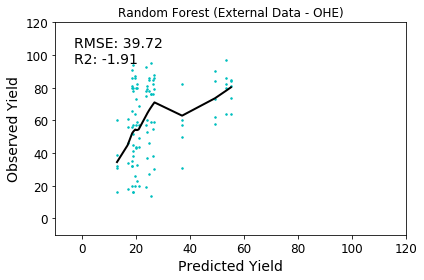

In [22]:
plt.plot(y_pred_ex, y_ex, 'c.', markersize=3)
plt.title('Random Forest (External Data - OHE)')
plt.axis([-10, 120, -10, 120])
plt.xlabel('Predicted Yield')
plt.ylabel('Observed Yield')
plt.text(30, 95, "RMSE: 39.72\nR2: -1.91", size=14, va="baseline", ha="right", multialignment="left")

# How to plot Lowess curve
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
Z = lowess(y_ex, y_pred_ex, frac=0.5, it=2)
plt.plot(Z[:,0],Z[:,1],'k-',lw=2)

plt.savefig('./Figs/Random Forest (External Data - OHE)', dpi=600, bbox_inches = 'tight')
plt.tight_layout()
plt.show()

In summay, RF model with OHE method didn't provide good model performance. 